In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import f_oneway, norm, shapiro
from statsmodels.stats.multicomp import pairwise_tukeyhsd

import seaborn as sns




In [85]:
#df = pd.read_csv('c:\\Users\\olubu\\OneDrive - Tufts\\Bunmi - NavehLab-01\\Raman_Bunmi\\Master_Data\\MCR\\Phe_CvT\\Para_Scores.csv')#, sheet_name = "Sheet1")
#MCR_CtrlvTrt\\Para_Scores_Summary.xlsx
df = pd.read_excel('c:\\Users\\oadeji01\\OneDrive - Tufts\\Bunmi - NavehLab-01\\Raman_Bunmi\\Master_Data\\MCR\\Phe_CvT\\Orth_Scores_Ldgs.xlsx', sheet_name='Scores')
df.head()

,sample,trt_time,Scores on Comp 3 (52.75%),Scores on Comp 4 (33.35%)
0,Ctrl,20mins,0.023749,0.002659
1,Ctrl,20mins,0.024298,0.004785
2,Ctrl,20mins,0.020788,0.014965
3,Ctrl,20mins,0.022233,0.008149
4,Ctrl,20mins,0.021798,0.010418


In [88]:

data = []
for x in ['2mins','20mins', '40mins', '60mins', '24h']:
    dff = df[df['trt_time'].str.contains(x)]
    print(f"{shapiro(dff['Scores on Comp 4 (9.14%)'])[1]}")
    tukey = pairwise_tukeyhsd(endog=dff['Scores on Comp 3 (52.75%)'],
                            groups=dff['sample'],
                            alpha=0.05
                            )
    #display results
    #print(f"Results for {x}")
    #print(tukey)
    #print('*****************************************************')
    data.append(pd.DataFrame(tukey.summary().data[1:], columns = tukey.summary().data[0]))

KeyError: 'Scores on Comp 4 (9.14%)'

In [87]:
stat_results = pd.concat(data).reset_index(drop=True).iloc[:13, :]
stat_results.insert(7, 'sig', value = ['**' if x < 0.01 else ('*' if x<0.05  else 'ns') for x in stat_results['p-adj']])
stat_results#.head()

ValueError: No objects to concatenate

In [58]:
df['trt_time'].unique()

array(['20mins', '24h', '2mins', '40mins', '60mins', '20mins24h',
       '2mins24h', '40mins24h', '60mins24h'], dtype=object)

"for l in [1.5, 3.5, 5.5, 7.5]:\n    plt.axvline(l, ls = '--', color = 'maroon', lw = .5)"

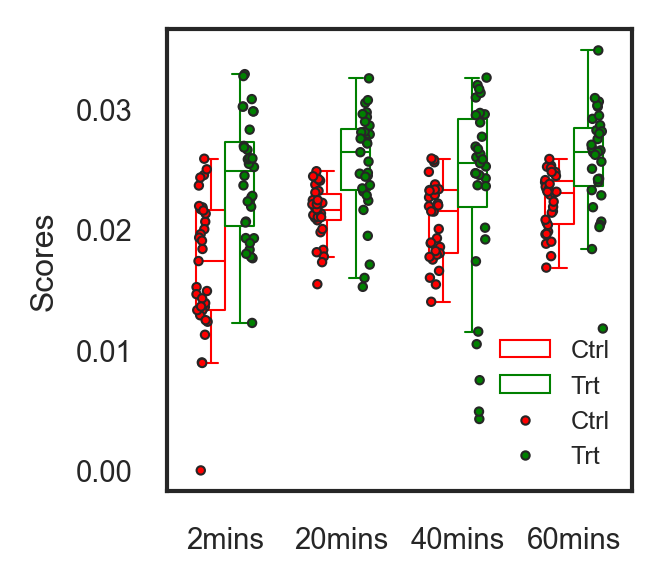

In [89]:
df[df['trt_time'].isin(['2mins', '20mins', '40mins', '60mins'])]
sns.set_theme(context = 'paper', font_scale = .8, style = 'white', rc={"patch.linewidth": 1.0})
plt.figure(figsize = (2, 2), dpi = 300);
sns.boxplot(
    x = 'trt_time',
    y = 'Scores on Comp 3 (52.75%)',
    data = df,
    hue = 'sample',
    order = ['2mins', '20mins','40mins', '60mins'],
       linewidth = .5,
       dodge=True,
       palette = ['red','green'],
       width = .5,
    showfliers = False,
    fill = False
);
sns.stripplot(
    x = 'trt_time',
    y = 'Scores on Comp 3 (52.75%)',
    data = df,
    hue = 'sample',
    order = ['2mins', '20mins','40mins', '60mins'],
       linewidth = .5,
       dodge=True,
       palette = ['red','green'],
    size = 2,
);
plt.xlabel('')
plt.ylabel('MCR Concentration (a.u.)')
plt.legend(title = '', frameon = False, fontsize = 6)
'''plt.xticks(position = [-0.25, 0, .5, 1, 2.5, 2,2.5, 4, 4.5, 5, 5.5, 6, 7.5, 8, 9.5, 10, 11.5, 12],
           labels= ['2mins', '2mins24h', '20mins', '20mins24h', '40mins', '40mins24h', ' ', '60mins', 
       '60mins24h',' ', '24h'],
           rotation = 45);'''

#plt.xticks([0.3]) 
#ax.set_xticks(positions)
plt.ylabel('Scores');
#plt.axvline(-0.25)
'''for l in [1.5, 3.5, 5.5, 7.5]:
    plt.axvline(l, ls = '--', color = 'maroon', lw = .5)'''

In [79]:
ldgs = pd.read_excel('c:\\Users\\oadeji01\\OneDrive - Tufts\\Bunmi - NavehLab-01\\Raman_Bunmi\\Master_Data\\MCR\\Phe_CvT\\Para_Ldgs1.xlsx', sheet_name='Sheet1')
ldgs.head()

,Trt,Comp. 1 (2.11%),Comp. 2 (16.19%),Comp. 3 (71.70%),Comp. 4 (9.07%),Q Residuals (0.93%),Unnamed: 6,Ctrl,Comp. 1 (1.81%),Comp. 2 (16.16%),Comp. 3 (72.38%),Comp. 4 (9.14%),Q Residuals (0.52%),Unnamed: 13,Unnamed: 14,Collagen diff
0,753.117,0.011190,0.025495,0.012782,0.014524,0.000010,NaN,753.117,0.011190,0.006650,0.012643,0.024970,0.000005,NaN,NaN,0.000525
1,754.260,0.011327,0.024979,0.013232,0.016688,0.000008,NaN,754.260,0.011327,0.008752,0.012909,0.025008,0.000004,NaN,NaN,-0.000029
2,755.404,0.011498,0.024489,0.013603,0.018652,0.000007,NaN,755.404,0.011498,0.010661,0.013104,0.024984,0.000003,NaN,NaN,-0.000495
3,756.546,0.011668,0.024026,0.013897,0.020418,0.000007,NaN,756.546,0.011668,0.012377,0.013230,0.024898,0.000003,NaN,NaN,-0.000872
4,757.688,0.011864,0.023589,0.014112,0.021984,0.000006,NaN,757.688,0.011864,0.013900,0.013286,0.024750,0.000003,NaN,NaN,-0.001161


In [80]:
spec = ldgs[['Comp. 2 (16.19%)', 'Comp. 4 (9.14%)']]
spec.head()

,Comp. 2 (16.19%),Comp. 4 (9.14%)
0,0.025495,0.024970
1,0.024979,0.025008
2,0.024489,0.024984
3,0.024026,0.024898
4,0.023589,0.024750


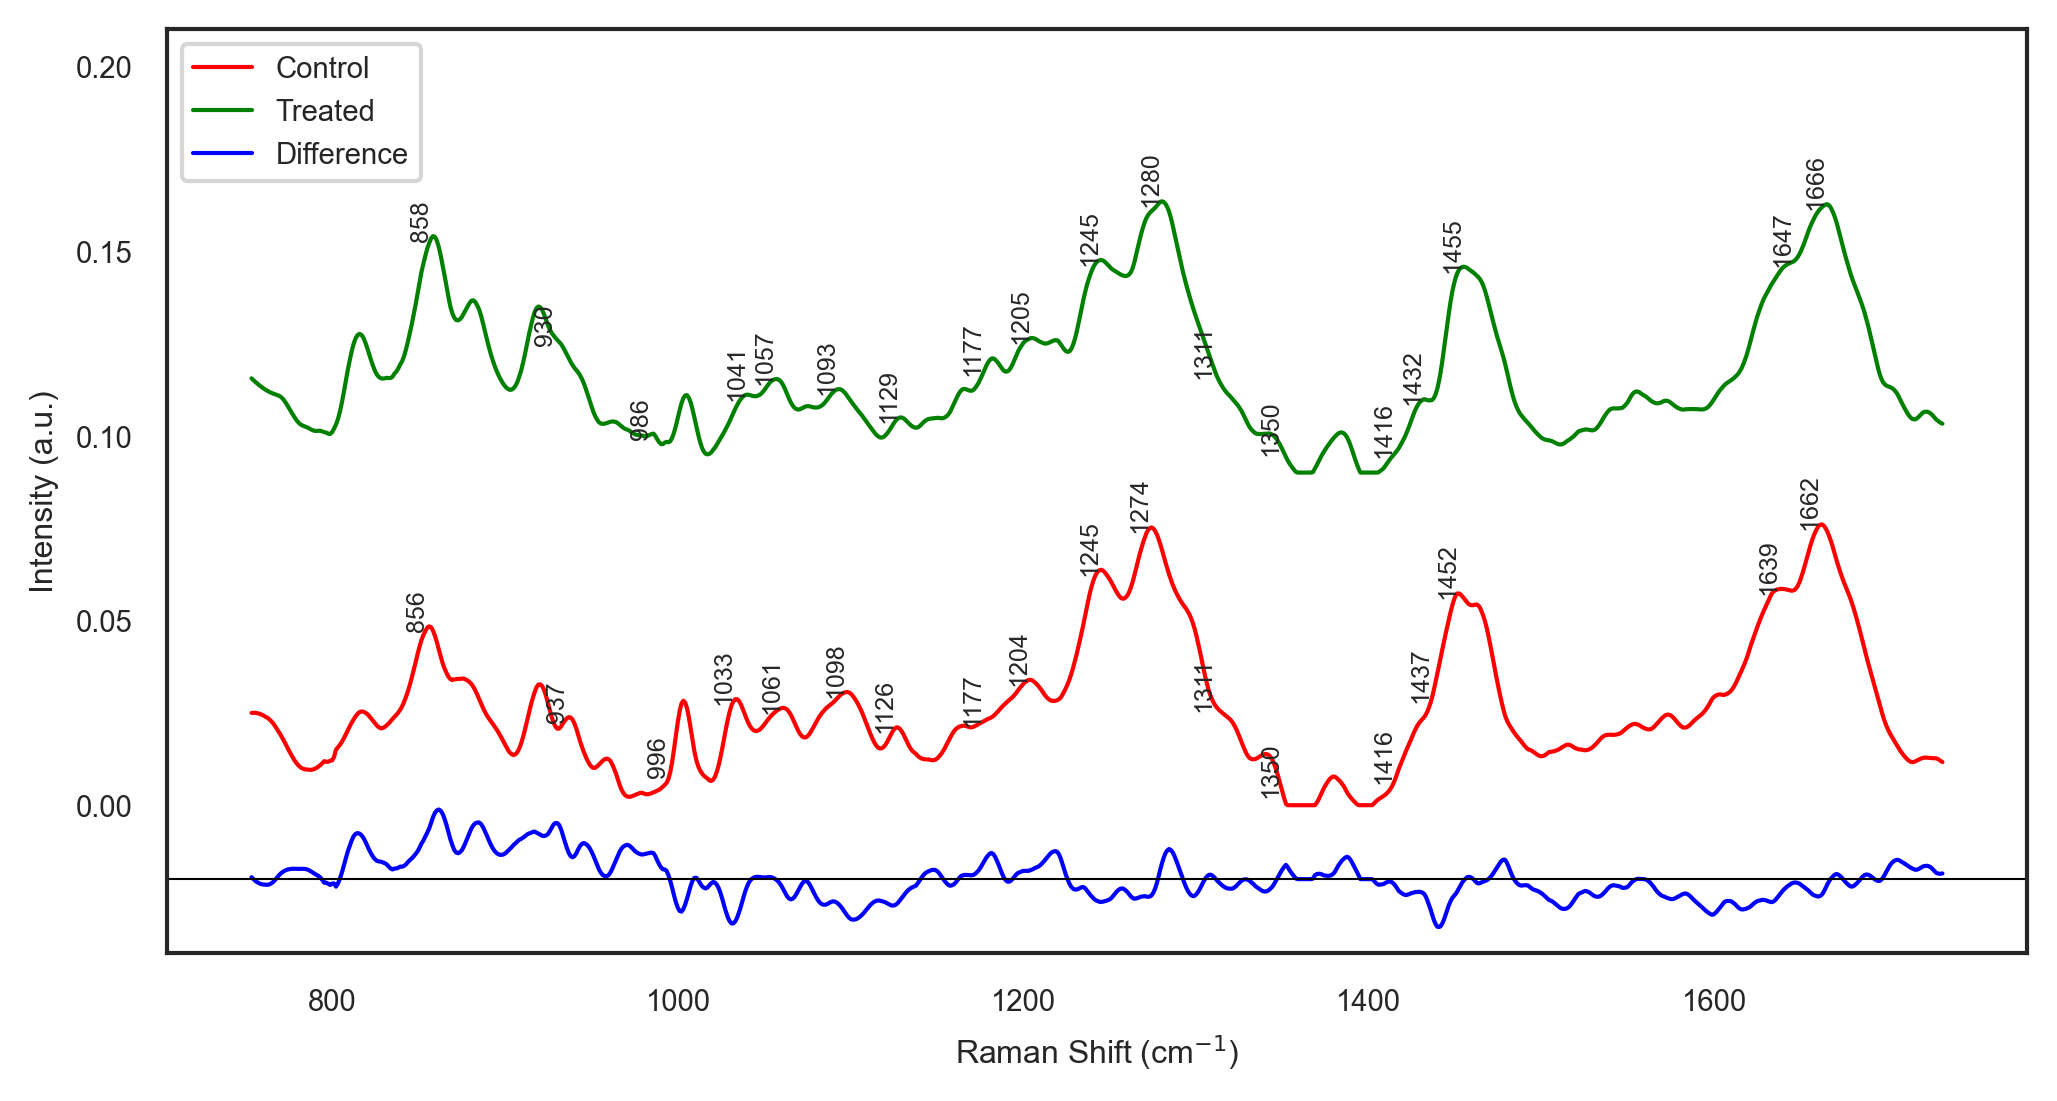

In [90]:
plt.figure(figsize = (8, 4), dpi = 300)
sns.lineplot(
    x = 'Ctrl',
    y = 'Comp. 4 (9.14%)',
    data = ldgs,
    label = 'Control',
    color = 'red',
    lw = 1
)
sns.lineplot(
    x = 'Ctrl',
    y = ldgs['Comp. 2 (16.19%)'] + .09,
    data = ldgs,
    label = 'Treated',
    color = 'green',
    lw = 1
)
sns.lineplot(
    x = 'Ctrl',
    y = ldgs['Collagen diff']- .02,
    data = ldgs,
    label = 'Difference',
    color = 'blue',
    lw = 1
)
plt.xlabel("Raman Shift (cm$^{-1}$)")
plt.ylabel('Intensity (a.u.)')
plt.ylim(-.04, .21)
plt.axhline(-.02, lw = .5, color = 'black')

ctrs = [857,940, 985,1033, 1062, 1100, 1135, 1167, 1207, 1245, 1270, 1321, 1360, 1405, 1426, 1451, 1636, 1663]#816, 857, 876, 921,  1003, 
for c in ctrs:
    for b in [0, 1]:
        mask = (ldgs['Trt'] >= c - 10) & (ldgs['Trt'] <= c + 11)

        loc_idx = ldgs['Trt'][mask]
        peak_idx = spec.iloc[:, b][mask]

        idx_max = np.argmax(peak_idx)
        peak_wl = loc_idx.values[idx_max]
        int_val = peak_idx.values[idx_max]
                #print(int_val)
        if b == 1:
            plt.text(peak_wl, int_val,#.3 * (len(sub) + 0.3),
            f'{peak_wl:.0f}', rotation=90, fontsize=6, ha='right')
        else:
            plt.text(peak_wl, int_val + .09, #* (len(sub) + 0.3),
                f'{peak_wl:.0f}', rotation=90, fontsize=6, ha='right')

In [7]:
# for unequal variances
import pingouin as pg
data1 = []
for x in ['2mins','20mins', '40mins', '60mins', '24h']:
    dff = df[df['trt_time'].str.contains(x)]
    print(f"{shapiro(dff['Scores on Comp 2 (16.16%)'])[1]}")
    tukey = pg.pairwise_gameshowell(
        data = dff,
        dv='Scores on Comp 2 (16.16%)',
                            between='sample'
                            ).round(3)
    #display results
    print(f"Results for {x}")
    print(tukey)
    print('*****************************************************')
    data1.append(tukey)

ModuleNotFoundError: No module named 'pingouin'

In [78]:
gh_stats = pd.concat(data1)
gh_stats.insert(10, 'sig', value = ['**' if x < 0.01 else ('*' if x<0.05  else 'ns') for x in gh_stats['pval']])

In [79]:
gh_stats

,A,B,mean(A),mean(B),diff,se,T,df,pval,hedges,sig
0,Ctrl,Trt,0.561,0.327,0.234,0.021,11.220,53.551,0.000,2.859,**
1,Ctrl,Trt_24h,0.561,0.493,0.068,0.024,2.887,48.595,0.016,0.736,*
2,Trt,Trt_24h,0.327,0.493,-0.166,0.026,-6.379,56.301,0.000,-1.626,**
0,Ctrl,Trt,0.606,0.345,0.261,0.019,13.717,56.319,0.000,3.406,**
1,Ctrl,Trt_24h,0.606,0.521,0.086,0.032,2.708,51.027,0.025,0.648,*
2,Trt,Trt_24h,0.345,0.521,-0.175,0.030,-5.842,43.563,0.000,-1.379,**
0,Ctrl,Trt,0.622,0.325,0.297,0.025,12.026,47.742,0.000,3.108,**
1,Ctrl,Trt_24h,0.622,0.530,0.092,0.021,4.295,64.461,0.000,1.004,**
2,Trt,Trt_24h,0.325,0.530,-0.205,0.027,-7.616,57.605,0.000,-1.887,**
0,Ctrl,Trt,0.651,0.363,0.288,0.021,13.833,58.999,0.000,3.495,**


In [87]:
df = pd.read_csv('c:\\Users\\oadeji01\\OneDrive - Tufts\\Bunmi - NavehLab-01\\Raman_Bunmi\\Master_Data\\MCR\\MCR_CvT2\\Para_Scores.csv')#, sheet_name = "Sheet1")
#MCR_CtrlvTrt\\Para_Scores_Summary.xlsx
df.head()

,Label,Label.1,sample,trt_time,orient,spectra_num,details,Class,Scores on Comp 1 (3.16%),Scores on Comp 2 (35.28%),Scores on Comp 3 (10.33%),Scores on Comp 4 (49.93%),Q Residuals (1.30%),Q Residuals Reduced (p=0.950) (1.30%),KNN Score Distance (k=3)
0,NaN,20250616,Ctrl,20mins,Para,1,0616-Ctrl-20mins-Para,Ctrl,0.000194,0.578266,0.030310,0.391230,2.074749,0.274836,0.046902
1,NaN,20250616,Ctrl,20mins,Para,2,0616-Ctrl-20mins-Para,Ctrl,0.000180,0.525329,0.026295,0.448196,0.871580,0.115456,0.028521
2,NaN,20250616,Ctrl,20mins,Para,3,0616-Ctrl-20mins-Para,Ctrl,0.000300,0.427942,0.026830,0.544928,3.370301,0.446453,0.080342
3,NaN,20250616,Ctrl,20mins,Para,4,0616-Ctrl-20mins-Para,Ctrl,0.000235,0.465124,0.014162,0.520479,1.126241,0.149190,0.061708
4,NaN,20250616,Ctrl,20mins,Para,6,0616-Ctrl-20mins-Para,Ctrl,0.000222,0.312003,0.026229,0.661545,0.885682,0.117324,0.064830


In [88]:
tukey = pairwise_tukeyhsd(endog=df['Scores on Comp 2 (35.28%)'],
                            groups=df['Class'],
                            alpha=0.05
                            )
print(tukey)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
  Ctrl    Trt  -0.0406 0.0003 -0.0622 -0.019   True
---------------------------------------------------
